# Data Understanding
1. **[Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))**
   1. [Importing Necessary Packages](#IMPORTING-NECESSARY-PACKAGES)
   2. [Loading the Test and Train Datasets](#LOADING-THE-DATASETS)
2. **[Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))**
   1. [Understanding the attributes (Desriptive Statistics, # of NAs, # of Unique Values, Type of Variable)](#UNDERSTANDING-THE-ATTRIBUTES)
   2. [Exploring Categorical Variables](#Exploring-Categorical-Variables)
   3. [Exploring Quantitative Variables](#Exploring-Quantitative-Variables)

# 2a. Data Understanding (Data Collection)
[2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

### IMPORTING NECESSARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from scipy.stats import mode

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### LOADING THE DATASETS

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [5]:
train.shape

(8523, 12)

In [6]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [7]:
train.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# 2b. Data Understanding (Initial Exploratory Data Analysis)
**This step will help us answer the following questions about our Data:**
* Understand the meaning of each variable.
* Are there any missing values in the column?
* Is there any visible relationship between any two columns?
* How much Data Preprocessing needs to be done and on which column.
* Which columns will be useful for the analysis?

[2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))

### UNDERSTANDING THE ATTRIBUTES

Our combined DataFrame df contains 13 columns:<br>
7 Categorical Predictor(Independent) Variables<br>
4 Quantitative Predictor(Independent) Variables<br>
1 Quantitative Target(Response/Dependent) Variable<br>
1 temporary variable 'data' which is used to identify Train/Test Datasets.

In [8]:
# Having a look at the data types of different columns.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
# Statistical Summary of Numerical Columns.
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Number of Unique values in each Variable
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
# Total Number of NULL Values in Every Column
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Exploring Dependent Variable

In [12]:
train.loc[:,'Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

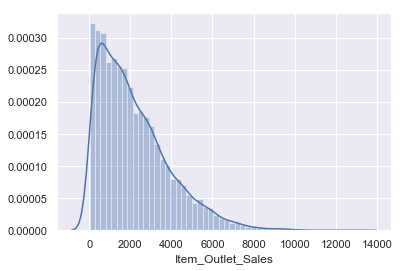

In [13]:
sns.distplot(train['Item_Outlet_Sales'].dropna());

In [14]:
print("Skew:",train['Item_Outlet_Sales'].skew())
print("Kurtosis:",train['Item_Outlet_Sales'].kurt())

Skew: 1.1775306028542798
Kurtosis: 1.6158766814287264


Hence we can see that our Dependent Variable is highly right skewed.

## Exploring Categorical Variables
LINK => [Exploring Quantitative Variables](#Exploring-Quantitative-Variables)<br>
LINK => [2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))<br>
LINK => [2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

In [15]:
# Getting a list of Categorical variables
# list(train.select_dtypes(include='object').columns)
train.select_dtypes(include='object').dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [16]:
# Create a separate DataFrame which contains only categorical variables.
df_categorical = train.select_dtypes(include='object').copy()
df_categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [17]:
# Function for performing basic statistics on a Categorical Variable
def basic_stat_categorical(df_1,column,vartype=0):
    '''
        df_1 => DataFrame
        column => Categorical Variable within the DataFrame
        vartype => 0(Nominal)/1(Ordinal)
    '''
    if vartype==0:
        vartype_name = "Nominal"
    else:
        vartype_name = "Ordinal"
    print(color.RED+color.BOLD+column+color.END)
    print("")
    print(color.BOLD+"Variable Type:"+color.END,vartype_name)
    print(color.BOLD+"List of Distinct Categories:"+color.END,df_1.loc[:,column].unique())
    print(color.BOLD+"Count of Distinct Categories (Incl. NULL):"+color.END,len(df_1.loc[:,column].unique()))
    print(color.BOLD+"Count of Distinct Categories (Excl. NULL):"+color.END,df_1.loc[:,column].nunique())
    print(color.BOLD+"Number of missing values:"+color.END,df_1.loc[:,column].isnull().sum())
    print(color.BOLD+"Percentage of missing values:"+color.END,df_1.loc[:,column].isnull().sum()/df_1.shape[0])

In [18]:
# Function for calculating % of values of each category out of total values in a variable
def categorical_percentage(df_1, column):
    total = len(df_1)                                               # Total rows in the DataFrame
    list1 = list(df_1.loc[:,column].value_counts().index)      # list of all categories in the Column
    counts = list(df_1.loc[:,column].value_counts().values)         # list of values of corresponding categories
    for i in range(len(list1)):
        print(color.BOLD+list1[i],":"+color.END,counts[i]/total*100)

### 1. Item_Identifier 

In [19]:
train['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [20]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Item_Identifier',0)

Item_Identifier

Variable Type: Nominal
List of Distinct Categories: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Count of Distinct Categories (Incl. NULL): 1559
Count of Distinct Categories (Excl. NULL): 1559
Number of missing values: 0
Percentage of missing values: 0.0


In [21]:
# Frequency of every category
# Only head and tail are displayed
print(train['Item_Identifier'].value_counts().head())
print(".\n.\n.")
print(train['Item_Identifier'].value_counts().tail())
print("")
print("Total Categories",len(train['Item_Identifier'].value_counts()))

FDW13    10
FDG33    10
FDX20     9
NCI54     9
DRN47     9
Name: Item_Identifier, dtype: int64
.
.
.
FDY43    1
FDQ60    1
FDN52    1
FDC23    1
FDO33    1
Name: Item_Identifier, dtype: int64

Total Categories 1559


In [22]:
# Sales corresponding to 'Item_Identifier'
train.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().head()

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
Name: Item_Outlet_Sales, dtype: float64

In order to draw some more information from this column:<br>
If we look a little closely, the **Item_Identifier** is made up of 5 characters: 3 alphabets & 2 numeric values.

Therefore let's try to select only the 3 alphabets and see if we can reduce the number of categories.

In [23]:
print(train.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts().head())
print(".\n.\n.")
print(train.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts().tail())
print("Total Categories",len(train.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts()))

FDX    295
FDT    281
FDS    279
FDR    275
FDW    271
Name: Item_Identifier, dtype: int64
.
.
.
DRO    14
DRP    12
DRZ    11
DRQ     7
DRY     6
Name: Item_Identifier, dtype: int64
Total Categories 71


Now selecting only 2 starting variables.

In [24]:
# Frequency of every category
print(train.loc[:,'Item_Identifier'].apply(lambda x: x[:2]).value_counts())

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


Here we can see that the categories have been reduced to 3 from 1559.<br>
Let's add this information to our dataframe as it can be useful later.

This information is used in combining categories in `Item_Type`.

### 2. Item_Fat_Content

In [25]:
train['Item_Fat_Content'].head()

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [26]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Item_Fat_Content',0)

Item_Fat_Content

Variable Type: Nominal
List of Distinct Categories: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Count of Distinct Categories (Incl. NULL): 5
Count of Distinct Categories (Excl. NULL): 5
Number of missing values: 0
Percentage of missing values: 0.0


Here we can see that the categories are not properly defined. We'll handle this in Data Cleaning Phase.

In [27]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

After cleaning we'll be left with only 2 categories => *Low Fat* and *Regular*

In [28]:
# Sales corresponding to 'Item_Fat_Content'
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

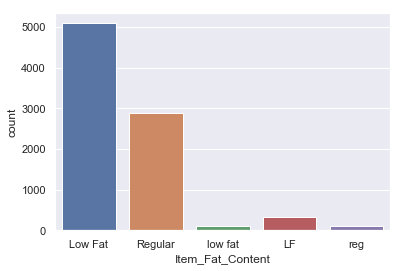

In [14]:
sns.countplot(x='Item_Fat_Content',data=train);

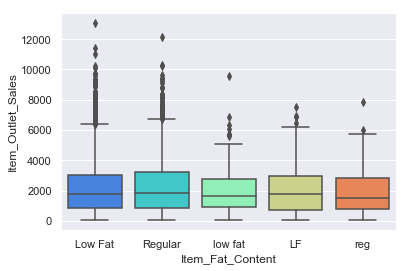

In [30]:
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train ,palette='rainbow');

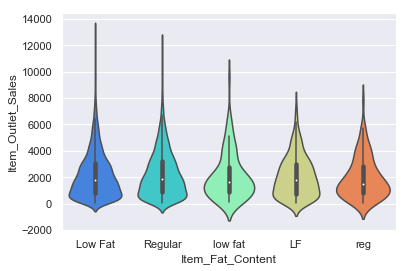

In [31]:
sns.violinplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train ,palette='rainbow');

### 3. Item_Type

In [32]:
train['Item_Type'].head()

0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
Name: Item_Type, dtype: object

In [33]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Item_Type',0)

Item_Type

Variable Type: Nominal
List of Distinct Categories: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Count of Distinct Categories (Incl. NULL): 16
Count of Distinct Categories (Excl. NULL): 16
Number of missing values: 0
Percentage of missing values: 0.0


In [34]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

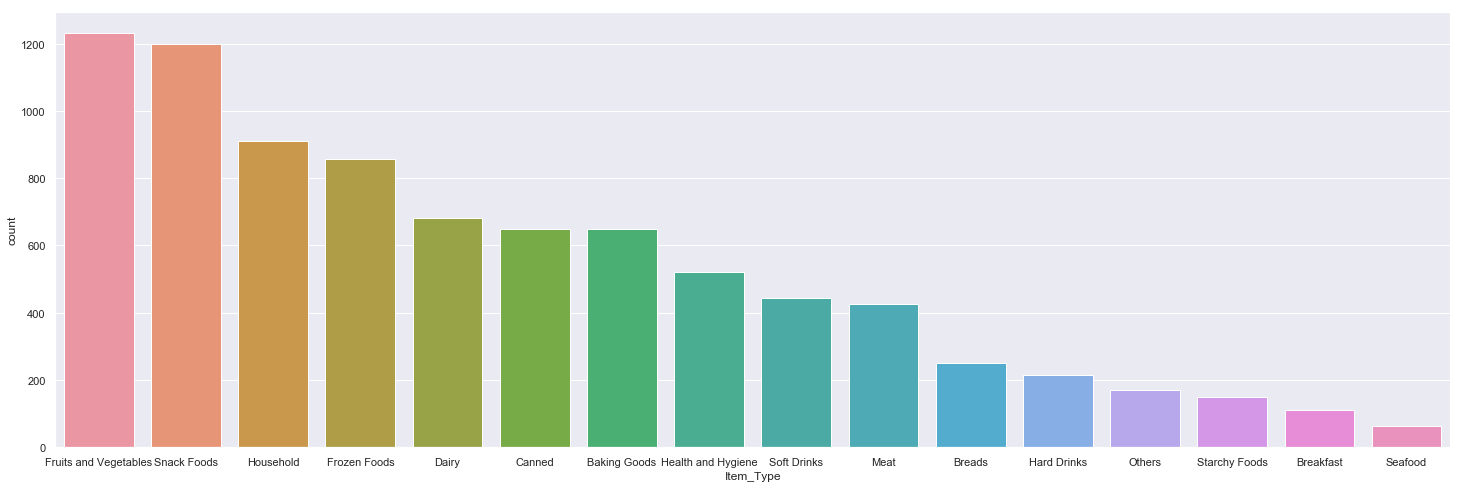

In [35]:
# Countplot
fig, axes = plt.subplots(figsize=(25,8))
sns.countplot(x='Item_Type',data=train,order=train['Item_Type'].value_counts().index);

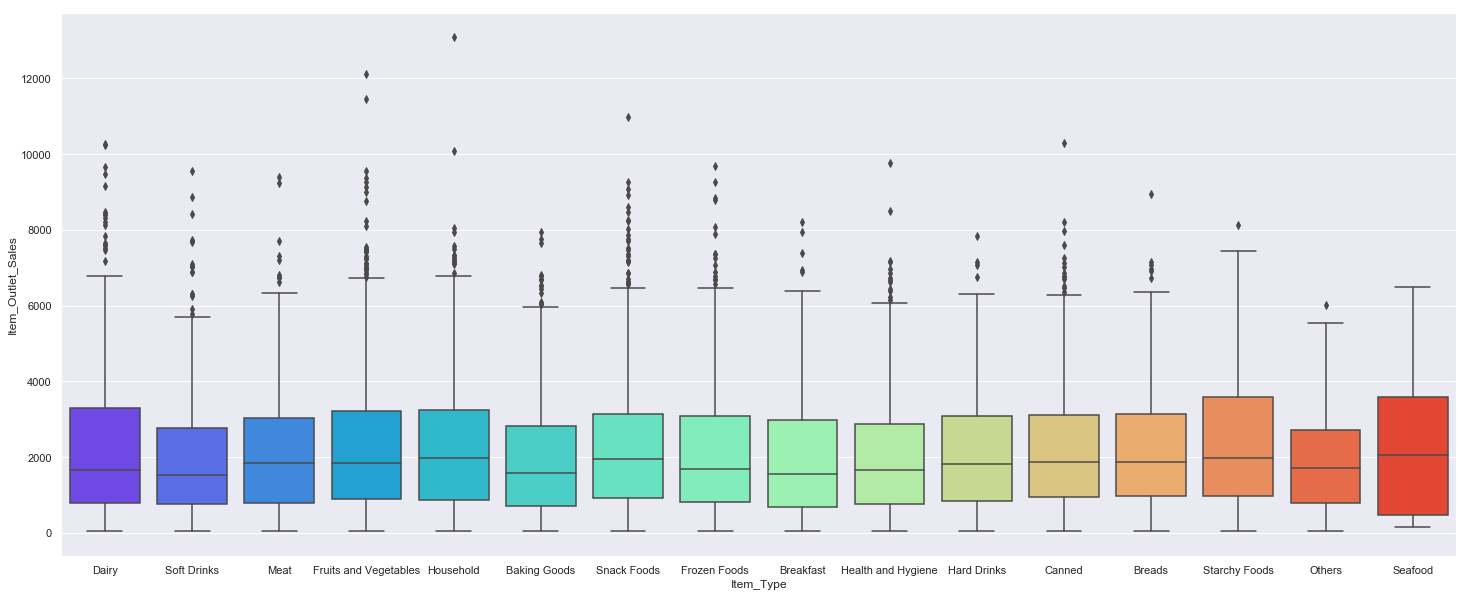

In [36]:
fig, axes = plt.subplots(figsize=(25,10))
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=train,palette='rainbow');

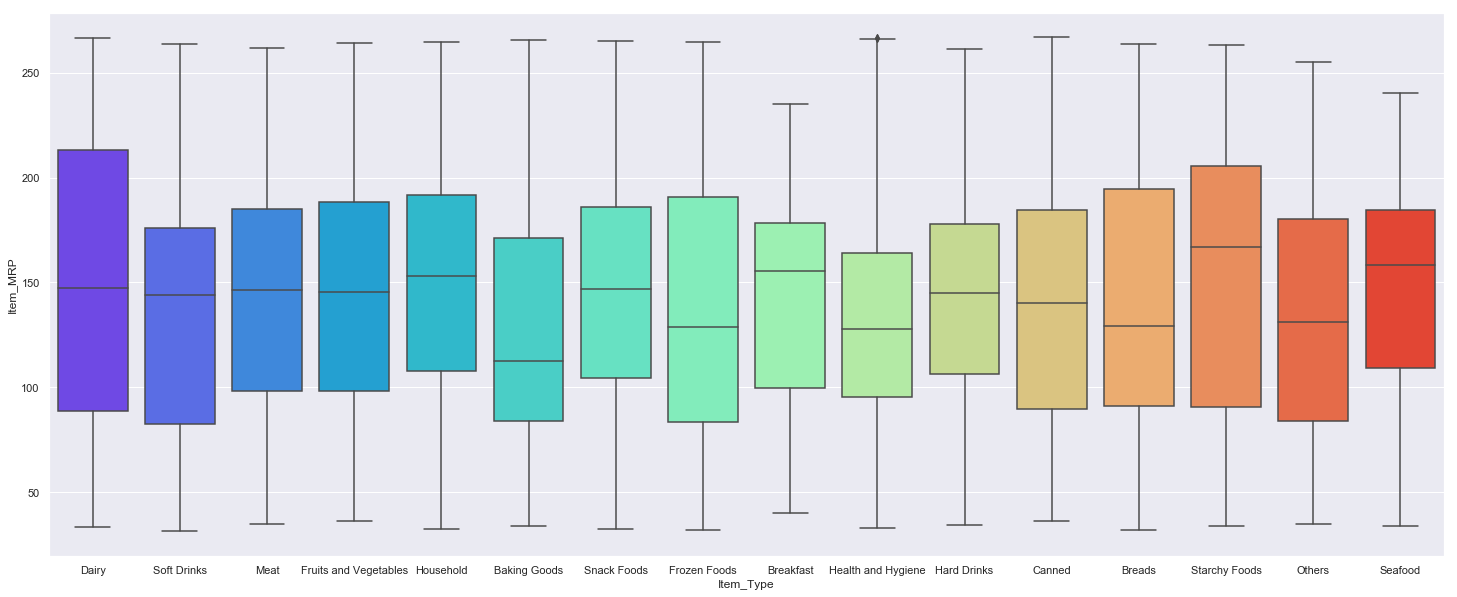

In [37]:
fig, axes = plt.subplots(figsize=(25,10))
sns.boxplot(x="Item_Type", y="Item_MRP", data=train ,palette='rainbow');

In [38]:
# Percentage of different categories within 'Item_Type' column.
categorical_percentage(train, 'Item_Type')

Fruits and Vegetables : 14.455004106535258
Snack Foods : 14.079549454417458
Household : 10.676991669599905
Frozen Foods : 10.04341194415112
Dairy : 8.00187727326059
Canned : 7.614689663264109
Baking Goods : 7.602956705385427
Health and Hygiene : 6.101138096914232
Soft Drinks : 5.2211662560131415
Meat : 4.986507098439517
Breads : 2.944972427548985
Hard Drinks : 2.51085298603778
Others : 1.9828698814971255
Starchy Foods : 1.7364777660448198
Breakfast : 1.2906253666549339
Seafood : 0.7509093042355978


In [39]:
# Since all the categories do not have sufficient amount of entries, it'll be better if we could group them.
train['Item_Type_Combined'] = train.loc[:,'Item_Identifier'].apply(lambda x: x[:2])
test['Item_Type_Combined'] = test.loc[:,'Item_Identifier'].apply(lambda x: x[:2])

In [40]:
train['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

In [41]:
test['Item_Type_Combined'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Type_Combined, dtype: int64

### 4. Outlet_Identifier

In [42]:
train['Outlet_Identifier'].head()

0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object

In [43]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Outlet_Identifier',0)

Outlet_Identifier

Variable Type: Nominal
List of Distinct Categories: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Count of Distinct Categories (Incl. NULL): 10
Count of Distinct Categories (Excl. NULL): 10
Number of missing values: 0
Percentage of missing values: 0.0


In [44]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(train, 'Outlet_Identifier')

OUT027 : 10.970315616566936
OUT013 : 10.935116742930893
OUT046 : 10.91165082717353
OUT035 : 10.91165082717353
OUT049 : 10.91165082717353
OUT045 : 10.89991786929485
OUT018 : 10.888184911416168
OUT017 : 10.864718995658805
OUT010 : 6.511791622668074
OUT019 : 6.195001759943682


In [45]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

From this we can infer that:<br>
OUT027 sells all 1559 items,<br> 
OUT013 sells 1553 out of 1559 items...

Let's see what is the sales of each Outlet.

In [46]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

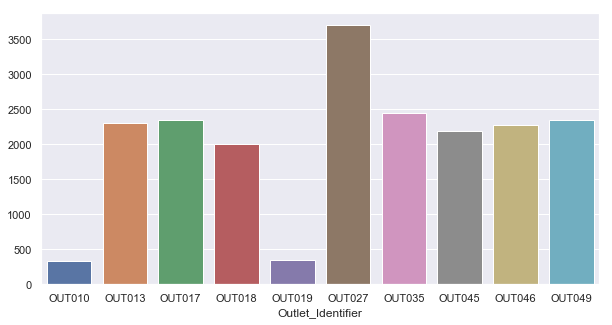

In [47]:
# BARPLOT depicting Mean Sales of Different Outlets
fig, axes = plt.subplots(figsize=(10,5))
sns.barplot(x=train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().index,
            y=train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().values,
            data=train)

### 5. Outlet_Size 

In [48]:
train['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [49]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Outlet_Size',0)

Outlet_Size

Variable Type: Nominal
List of Distinct Categories: ['Medium' nan 'High' 'Small']
Count of Distinct Categories (Incl. NULL): 4
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 2410
Percentage of missing values: 0.2827642848762173


Since the % of missing values is 28%, therefore if we remove we'll lose much of the valuable information.

In [50]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

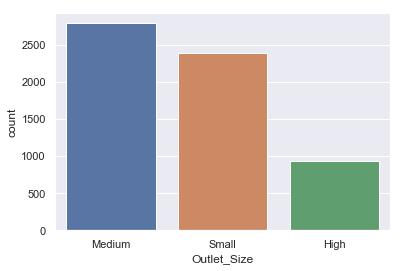

In [51]:
sns.countplot(x='Outlet_Size',data=train,order=train['Outlet_Size'].value_counts().index);

So, in order to remove NULL values let's see if can find a relation.

First let's see data regarding 'Outlet_Size' of which Outlets is missing??

In [52]:
train.groupby('Outlet_Identifier')['Outlet_Size'].value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             NaN            555
OUT013             High           932
OUT017             NaN            926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             NaN            929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

Here we can see that we've 3 stores whose data corresponding to 'Outlet_Size' is missing.<br>
The stores are: 'OUT010' , 'OUT017', 'OUT045'<br>

**APPROACH-1: Grouping accroding to 'Outlet_Type'**

In [53]:
train.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           528
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [54]:
# from scipy.stats import mode
train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))

C:\Users\Shivaansh\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


**APPROACH 2: Grouping according to 'Outlet_Location_Type'**

In [55]:
train.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                NaN            1855
                      Small           930
Tier 3                Medium         1863
                      High            932
                      NaN             555
Name: Outlet_Size, dtype: int64

### 6. Outlet_Location_Type

In [56]:
train['Outlet_Location_Type'].head()

0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object

In [57]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Outlet_Location_Type',0)

Outlet_Location_Type

Variable Type: Nominal
List of Distinct Categories: ['Tier 1' 'Tier 3' 'Tier 2']
Count of Distinct Categories (Incl. NULL): 3
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 0
Percentage of missing values: 0.0


### 7. Outlet_Type

In [58]:
train['Outlet_Type'].head()

0    Supermarket Type1
1    Supermarket Type2
2    Supermarket Type1
3        Grocery Store
4    Supermarket Type1
Name: Outlet_Type, dtype: object

In [59]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Outlet_Type',0)

Outlet_Type

Variable Type: Nominal
List of Distinct Categories: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Count of Distinct Categories (Incl. NULL): 4
Count of Distinct Categories (Excl. NULL): 4
Number of missing values: 0
Percentage of missing values: 0.0


In [60]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [61]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(train, 'Outlet_Type')

Supermarket Type1 : 65.43470608940514
Grocery Store : 12.706793382611755
Supermarket Type3 : 10.970315616566936
Supermarket Type2 : 10.888184911416168


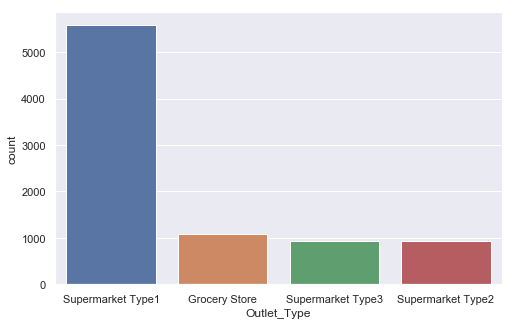

In [62]:
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train,order=train['Outlet_Type'].value_counts().index);

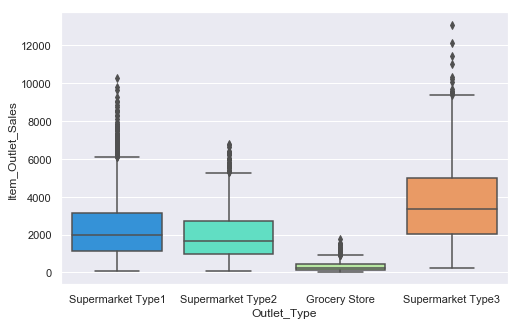

In [63]:
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train ,palette='rainbow');

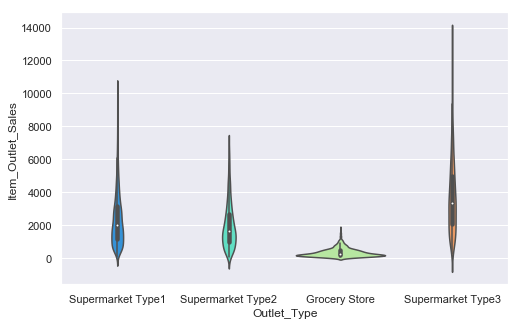

In [64]:
fig, axes = plt.subplots(figsize=(8,5))
sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train ,palette='rainbow');

### 8. Item_Type_Combined

In [66]:
train['Item_Type_Combined'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Combined, dtype: object

In [67]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(train, 'Item_Type_Combined',0)

Item_Type_Combined

Variable Type: Nominal
List of Distinct Categories: ['FD' 'DR' 'NC']
Count of Distinct Categories (Incl. NULL): 3
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 0
Percentage of missing values: 0.0


In [68]:
train['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

In [69]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(train, 'Item_Type_Combined')

FD : 71.86436700692245
NC : 18.760999648011264
DR : 9.374633345066291


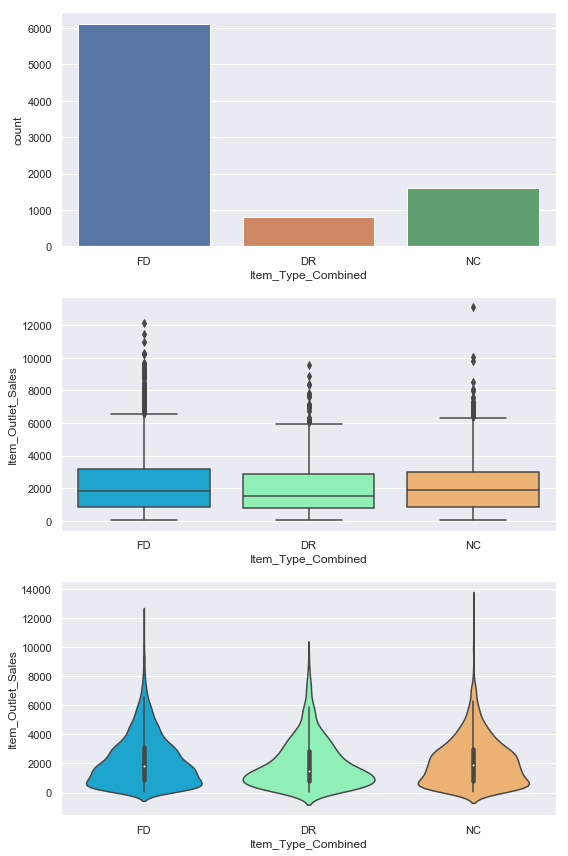

In [70]:
fig = plt.figure(figsize=(8,12))

axes1 = fig.add_subplot(3,1,1)
sns.countplot(x='Item_Type_Combined',data=train)

axes2 = fig.add_subplot(3,1,2)
sns.boxplot(x='Item_Type_Combined', y="Item_Outlet_Sales", data=train ,palette='rainbow');

axes3 = fig.add_subplot(3,1,3)
sns.violinplot(x='Item_Type_Combined', y="Item_Outlet_Sales", data=train ,palette='rainbow');

fig.tight_layout()

## Exploring Quantitative Variables
LINK => [Exploring Categorical Variables](#Exploring-Categorical-Variables)<br>
LINK => [2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))<br>
LINK => [2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

In [71]:
# Getting a list of Quantitative variables
# list(df.select_dtypes(include=['int64','float64']).columns)
train.select_dtypes(include=['int64','float64']).dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [72]:
# Create a separate DataFrame which contains only Quantitative variables.
df_quantitative = train.select_dtypes(include=['int64','float64']).copy()
df_quantitative.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [73]:
# Getting Correlation 
corr = df_quantitative.iloc[:,:5].corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [74]:
# Getting the Correlation with respect to the target variable
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


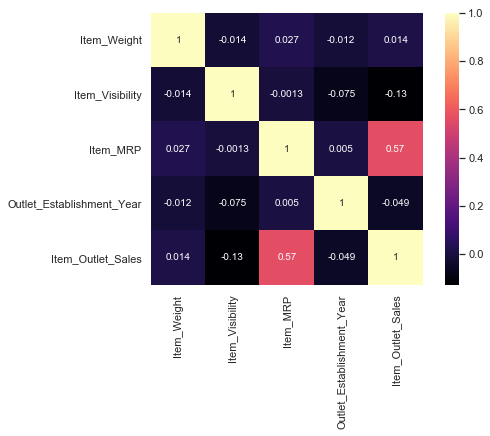

In [75]:
#correlation matrix
fig, axes = plt.subplots(figsize=(8,5))
sns.heatmap(corr,square=True,annot=True,cmap='magma');

Here we can see that there is NO Multicollinearity.<br>
Moreover we can also see that `Item_MRP` is correlated the most with the Dependent Variable `Item_Outlet_Sales`.

In [76]:
#sns.pairplot(df.dropna())

In [77]:
# Function for performing basic statistics on a Quantitative Variable
def basic_stat_quantitative(df_1,column):
    print(color.RED+color.BOLD+column+color.END)
    print("")
    print(color.BOLD+"First 5 rows of the column"+color.END)
    print(df_1[column].head())
    print(color.BOLD+"\nStatistical Summary of the column"+color.END)
    print(df_1[column].describe())
    print("")
    print(color.BOLD+"Number of missing values:"+color.END,df_1.loc[:,column].isnull().sum())
    print(color.BOLD+"Percentage of missing values:"+color.END,df_1.loc[:,column].isnull().sum()/df_1.shape[0])
    print(color.BOLD+"Skewness:"+color.END,df_1[column].skew())
    print(color.BOLD+"Kurtosis:"+color.END,df_1[column].kurt())

If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric

### 1. Item_Weight

In [78]:
train.pivot_table(values='Item_Weight', index='Item_Identifier').head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [79]:
basic_stat_quantitative(train,'Item_Weight')

Item_Weight

First 5 rows of the column
0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Statistical Summary of the column
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Number of missing values: 1463
Percentage of missing values: 0.1716531737651062
Skewness: 0.0824262091221237
Kurtosis: -1.2277664144376634


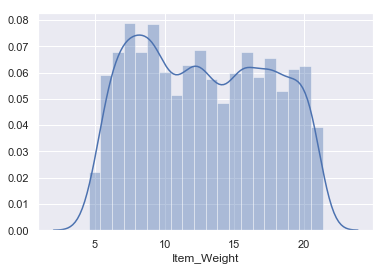

In [80]:
sns.distplot(train['Item_Weight'].dropna())

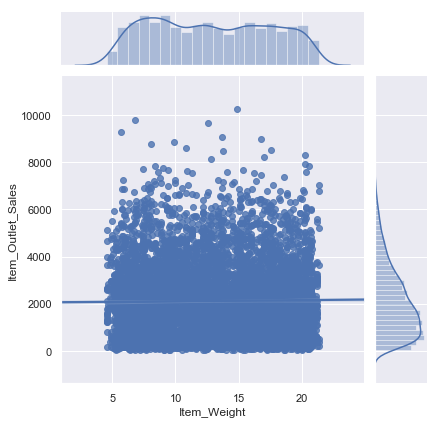

In [81]:
sns.jointplot(x='Item_Weight',y='Item_Outlet_Sales',data=train,kind='reg')

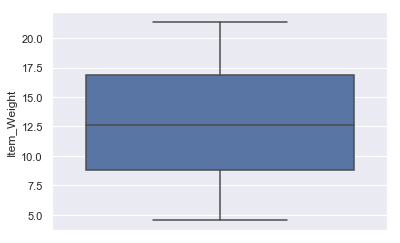

In [82]:
sns.boxplot(y='Item_Weight',data=train)

### 2. Item_Visibility

In [83]:
basic_stat_quantitative(train,'Item_Visibility')

Item_Visibility

First 5 rows of the column
0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

Statistical Summary of the column
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0
Skewness: 1.1670905496918407
Kurtosis: 1.6794454826024245


In [84]:
# Number of rows which contains 'Item_Visibility' as 0.
len(train.loc[train.loc[:,'Item_Visibility']==0,'Item_Visibility'])

526

We've 879 rows where 'Item_Visibility'=0 therefore we can either remove these altogether or replace these values with mean/median.

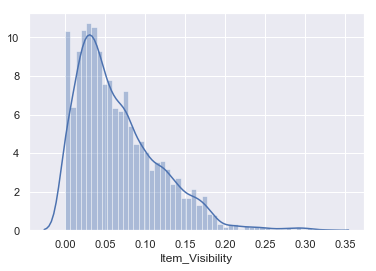

In [85]:
sns.distplot(train['Item_Visibility'].dropna());

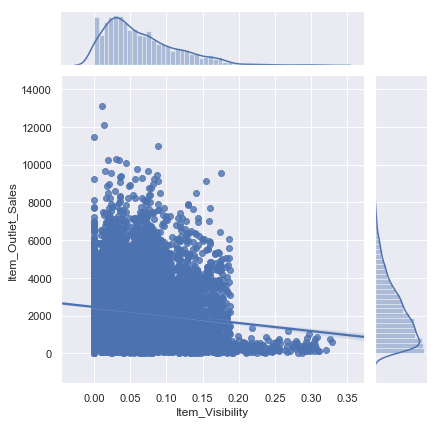

In [86]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train,kind='reg');

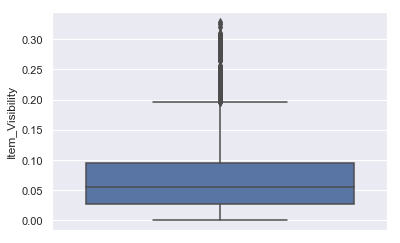

In [87]:
sns.boxplot(y='Item_Visibility',data=train);

### 3. Item_MRP

In [88]:
basic_stat_quantitative(train,'Item_MRP')

Item_MRP

First 5 rows of the column
0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

Statistical Summary of the column
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0
Skewness: 0.1272022683110526
Kurtosis: -0.8897690936963571


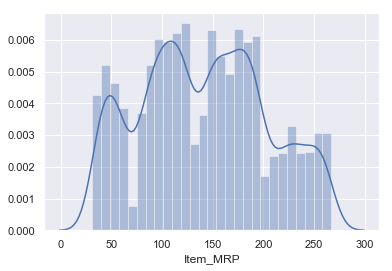

In [89]:
sns.distplot(train['Item_MRP'].dropna());

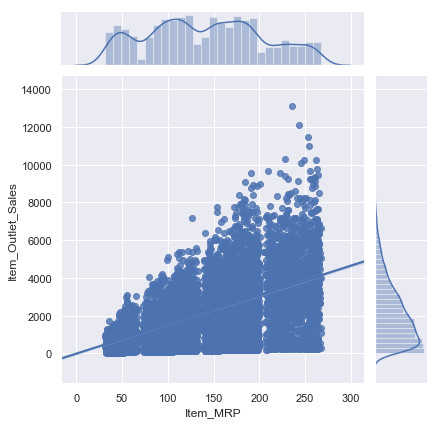

In [90]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=train,kind='reg');

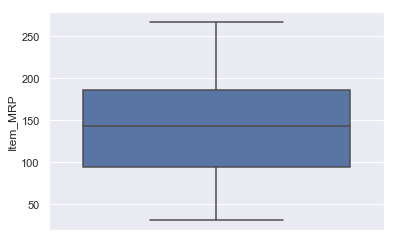

In [91]:
sns.boxplot(y='Item_MRP',data=train);

### 4. Outlet_Establishment_Year

In [92]:
basic_stat_quantitative(train,'Outlet_Establishment_Year')

Outlet_Establishment_Year

First 5 rows of the column
0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

Statistical Summary of the column
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0
Skewness: -0.39664078591550556
Kurtosis: -1.2056939170205112


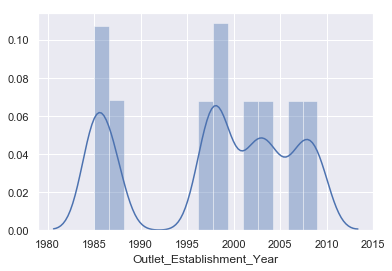

In [93]:
sns.distplot(train['Outlet_Establishment_Year'].dropna());

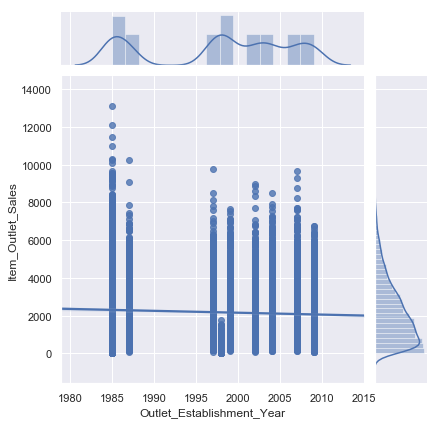

In [94]:
sns.jointplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train,kind='reg');

# Insights for Data Preparation Phase

### TARGET VARIABLE (QUANTITATIVE)
**Item_Outlet_Sales**

### CATEGORICAL Predictor VARIABLES 
List of Categorical Variables are:
1. **Item_Identifier**
2. **Item_Fat_Content**
   * Categories should be properly defined. 'low fat', 'lf' should be converted to 'Low Fat'; 'reg' should be converted to 'Regular'.
   * Moreover we also have to deal with outliers in this variable.
   
   
3. **Item_Type**
4. **Outlet_Identifier**
5. **Outlet_Size** (High/Medium/Small) => Treat Missing values using *Outlet Identifier*, no of items in that store, *Outlet_Type*.
6. **Outlet_Location_Type**
7. **Outlet_Type**
8. **Item_Categories** (FD/NC/DR) => This is a new variable created which maybe useful for building models.

### QUANTITATIVE Predictor VARIABLES
List of Quantitative Variables are:
1. **Item_Weight** =>
   * Treat Missing values using *Item_Identifier*.<br>
   * Data is not normally distributed.


2. **Item_Visibility** =>
   * Items having visibility 0 must be looked at because if the product is not kept in the store then it will not give us any information. (There are 879 such rows in both train and test dataset combined, Therefore we can even consider removing those rows or replace these values by mean/medain).
   * Not normally distributed.
   * Contains Outliers.
   
   
3. **Item_MRP** =>
    * Not normally distributed.
    
    
4. **Outlet_Establishment_Year** => 
    * Subtract all values from 2013.

In order to deal with missing values of **Item_Weight** <br>
We've 10 different types of items.<br>
Each type of item has different weight.<br>
Since all items of a particular type will have the same Item_Weight, we'll impute the missing values with the Item_Weight of the same item.<br>
We'll use 'Item Identiifer' for this purpose.

In [95]:
train.to_csv("train_explored.csv", index=False)
test.to_csv("test_explored.csv", index=False)